The purpose of this is to identify how much data will we use as our bacterial samples and how it will be split up amongst devices used to record the coughs. 

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt 

In [2]:
tb_screen_forced_path = '/media/sameer/Sameer Mem/TBscreen_Dataset/Forced_coughs/Forced_coughs.csv'
tb_screen_passive_path = '/media/sameer/Sameer Mem/TBscreen_Dataset/Passive_coughs/Passive_coughs.csv'

In [3]:
df_forced = pd.read_csv(tb_screen_forced_path)
df_passive = pd.read_csv(tb_screen_passive_path)

<ipython-input-3-9cdef35aad12>:2: DtypeWarning: Columns (28,29,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df_passive = pd.read_csv(tb_screen_passive_path)


In [4]:
df_passive.head()

,S.NO,path,subject,device,cohort,sub,Label,age,gndr_a,lab_sptm_xprt_rslt_a,...,comor,cough_cause_other,transfer_from_A,cough_cause,cough_trt,Primary findings,Cavities - Y/N; if Y number of lobes,Number_of_quadrants_with_consolidation,Abnormal_quadrants_number_denominator_4,Permission_sound
0,1,PID_1A_1_pixel_0,PID_1A,pixel,A,1,TB,25.0,0.0,3.0,...,6.0,NaN,NaN,NaN,NaN,"LLL consolidation limited, non cavitary",NO,1.0,1.0,Yes
1,2,PID_1A_1_codec_0,PID_1A,codec,A,1,TB,25.0,0.0,3.0,...,6.0,NaN,NaN,NaN,NaN,"LLL consolidation limited, non cavitary",NO,1.0,1.0,Yes
2,3,PID_1A1_yeti_0,PID_1A,yeti,A,1,TB,25.0,0.0,3.0,...,6.0,NaN,NaN,NaN,NaN,"LLL consolidation limited, non cavitary",NO,1.0,1.0,Yes
3,4,PID_1A_2_pixel_0,PID_1A,pixel,A,1,TB,25.0,0.0,3.0,...,6.0,NaN,NaN,NaN,NaN,"LLL consolidation limited, non cavitary",NO,1.0,1.0,Yes
4,5,PID_1A_2_codec_0,PID_1A,codec,A,1,TB,25.0,0.0,3.0,...,6.0,NaN,NaN,NaN,NaN,"LLL consolidation limited, non cavitary",NO,1.0,1.0,Yes


In [11]:
df_forced.head()

,Unnamed: 0,path,subject,device,cohort,sub,Label,age,gndr_a,lab_sptm_xprt_rslt_a,...,comor,cough_cause_other,transfer_from_A,cough_cause,cough_trt,Primary findings,Cavities - Y/N; if Y number of lobes,Number_of_quadrants_with_consolidation,Abnormal_quadrants_number_denominator_4,Permission_sound
0,0,PID_175A_0_codec,PID_175A,codec,A,175.0,TB,36.0,0.0,5.0,...,6.0,NaN,NaN,NaN,NaN,"RUL limited consolidatin, RLL/LUL infiltrate",NO,1,3.0,Yes
1,1,PID_175A_0_pixel,PID_175A,pixel,A,175.0,TB,36.0,0.0,5.0,...,6.0,NaN,NaN,NaN,NaN,"RUL limited consolidatin, RLL/LUL infiltrate",NO,1,3.0,Yes
2,2,PID_175A0_yeti,PID_175A,yeti,A,175.0,TB,36.0,0.0,5.0,...,6.0,NaN,NaN,NaN,NaN,"RUL limited consolidatin, RLL/LUL infiltrate",NO,1,3.0,Yes
3,3,PID_175A_1_codec,PID_175A,codec,A,175.0,TB,36.0,0.0,5.0,...,6.0,NaN,NaN,NaN,NaN,"RUL limited consolidatin, RLL/LUL infiltrate",NO,1,3.0,Yes
4,4,PID_175A_1_pixel,PID_175A,pixel,A,175.0,TB,36.0,0.0,5.0,...,6.0,NaN,NaN,NaN,NaN,"RUL limited consolidatin, RLL/LUL infiltrate",NO,1,3.0,Yes


## TB Labels for Forced Cough

In [5]:
tb_forced = df_forced['Label'] == 'TB'
print("The total number of forced coughs labeled TB is " + str(sum(tb_forced)))

The total number of forced coughs labeled TB is 983


## TB Labels for Passive Cough

In [6]:
tb_passive = df_passive['Label'] == 'TB'
print("The total number of passive coughs labeled TB is " + str(sum(tb_passive)))

The total number of passive coughs labeled TB is 23191


## Total Number of Recorded Forced Coughs for each Device

In [7]:
pixel_forced = df_forced.loc[df_forced['device'] == 'pixel']
codec_forced = df_forced.loc[df_forced['device'] == 'codec']
yeti_forced = df_forced.loc[df_forced['device'] == 'yeti']

pixel_forced_tb = pixel_forced['Label'] == 'TB'
codec_forced_tb = codec_forced['Label'] == 'TB'
yeti_forced_tb = yeti_forced['Label'] == 'TB'

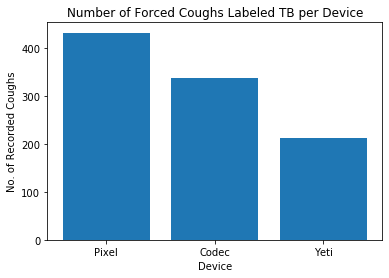

In [8]:
plt.bar(['Pixel', 'Codec', 'Yeti'], [sum(pixel_forced_tb.tolist()), sum(codec_forced_tb.tolist()), sum(yeti_forced_tb.tolist())])
plt.xlabel("Device")
plt.ylabel("No. of Recorded Coughs")
plt.title("Number of Forced Coughs Labeled TB per Device")
plt.show()

## Total Number of Recorded Passive Coughs for each Device

In [9]:
pixel_passive = df_passive.loc[df_passive['device'] == 'pixel']
codec_passive = df_passive.loc[df_passive['device'] == 'codec']
yeti_passive = df_passive.loc[df_passive['device'] == 'yeti']

pixel_passive_tb = pixel_passive['Label'] == 'TB'
codec_passive_tb = codec_passive['Label'] == 'TB'
yeti_passive_tb = yeti_passive['Label'] == 'TB'

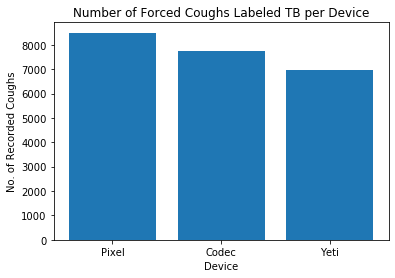

In [10]:
plt.bar(['Pixel', 'Codec', 'Yeti'], [sum(pixel_passive_tb.tolist()), sum(codec_passive_tb.tolist()), sum(yeti_passive_tb.tolist())])
plt.xlabel("Device")
plt.ylabel("No. of Recorded Coughs")
plt.title("Number of Forced Coughs Labeled TB per Device")
plt.show()